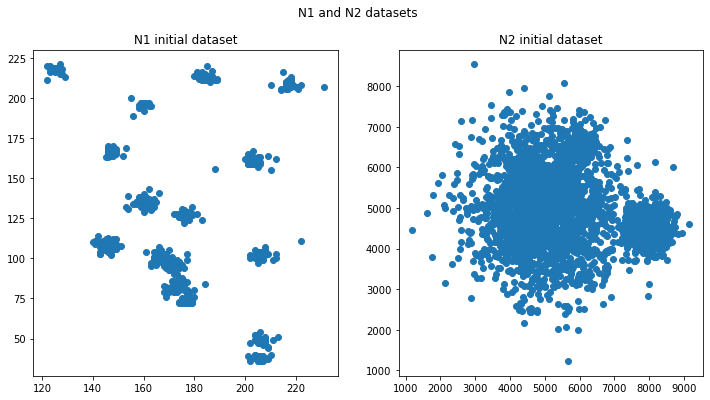

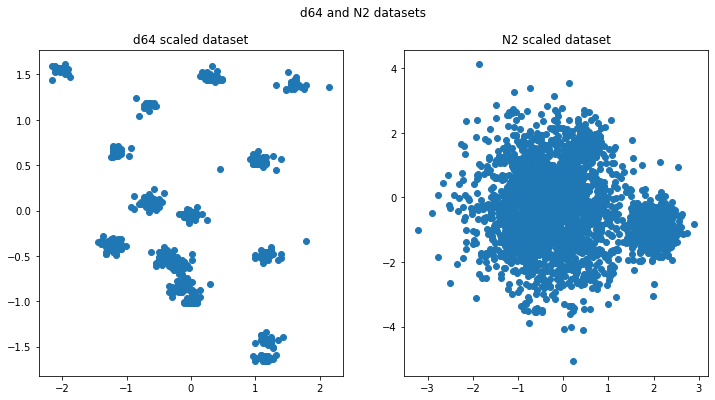

------------------------------------------------------
Utilisation de k-means sur les données scaled
best k is =  6
Best inert 3
Best silh 9
++++++++++++++++++++++++++++++++++++++++++++++++++++++
nb clusters = 6 , nb iter = 3 , runtime =  348.08 ms
best k is =  6
Best inert 3
Best silh 8
++++++++++++++++++++++++++++++++++++++++++++++++++++++
nb clusters = 6 , nb iter = 6 , runtime =  4026.47 ms


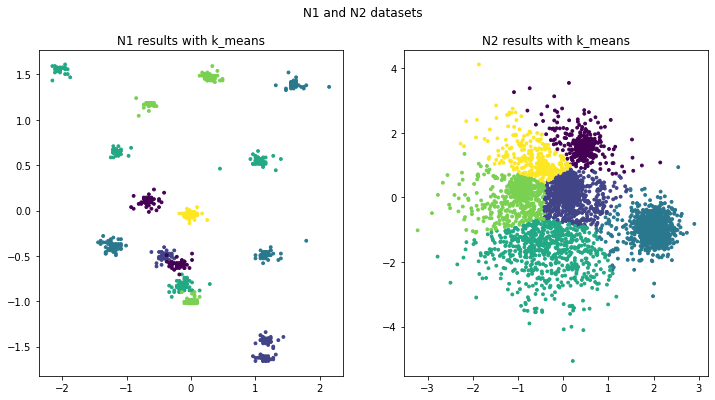

Best silhouette :  9
Best Davies-Bouldin :  9

best k is =  9
------------------------------------------------------
Best silhouette :  2
Best Davies-Bouldin :  7

best k is =  4
------------------------------------------------------
Appel Aglo Clustering 'complete' pour une valeur de 4 determinée automatiquement
nb clusters = 4 , runtime =  7082.9 ms


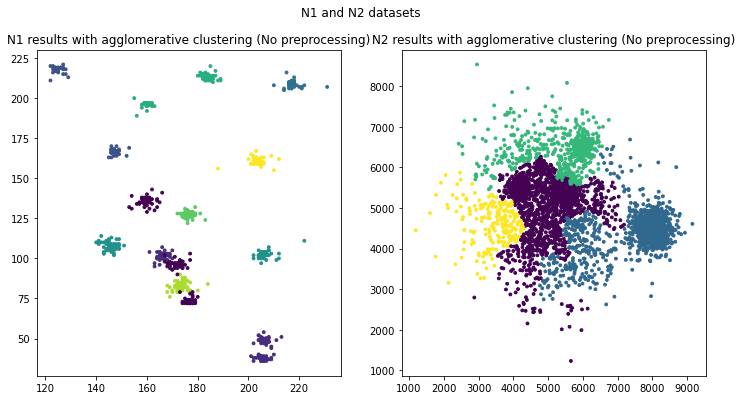

------------------------------------------------------


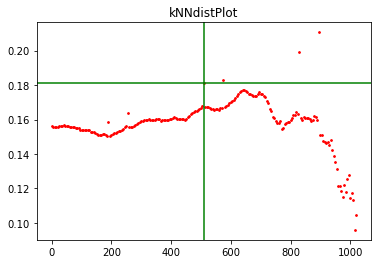

Knee value: x=510 , y=0.18101463543044402


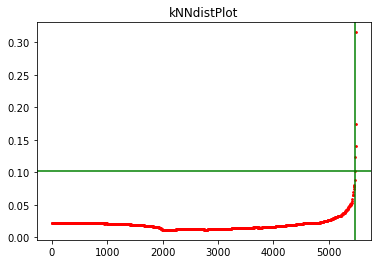

Knee value: x=5475 , y=0.10149748022854005
++++++++++++++++++++++++++++++++++++++++++++++++++++++
Estimated number of clusters: 16
Estimated number of noise points: 511


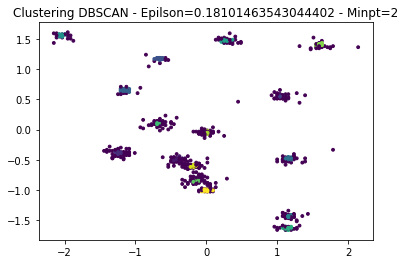

Estimated number of clusters: 16
Estimated number of noise points: 511


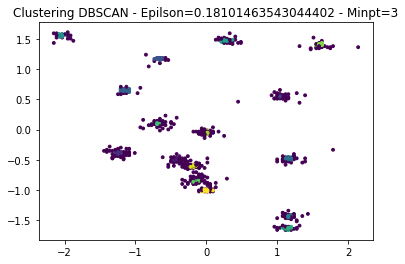

Estimated number of clusters: 16
Estimated number of noise points: 511


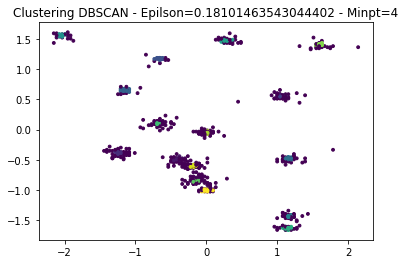

Estimated number of clusters: 16
Estimated number of noise points: 511


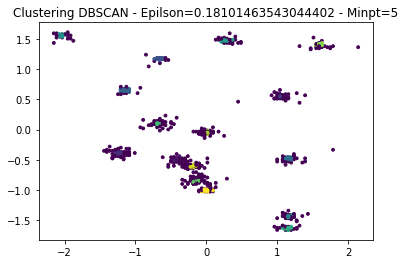

Estimated number of clusters: 16
Estimated number of noise points: 511


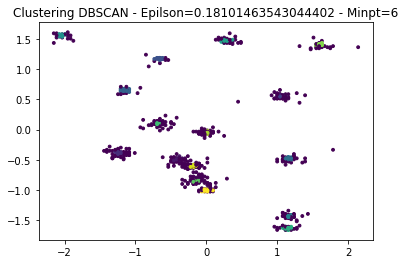

Estimated number of clusters: 16
Estimated number of noise points: 511


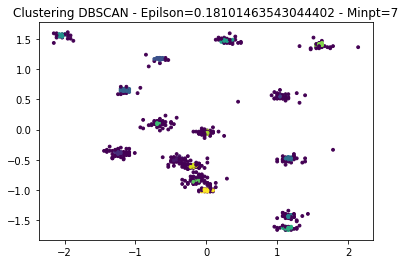

Estimated number of clusters: 113
Estimated number of noise points: 191


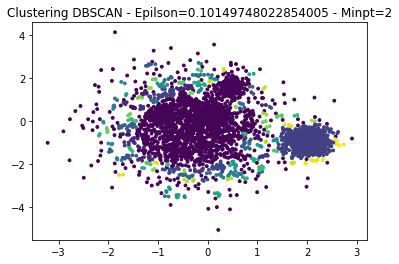

Estimated number of clusters: 64
Estimated number of noise points: 289


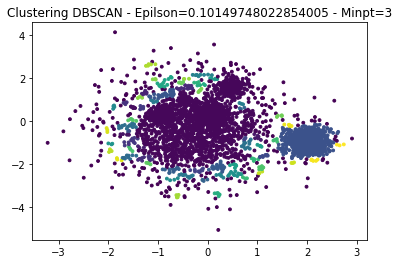

Estimated number of clusters: 53
Estimated number of noise points: 402


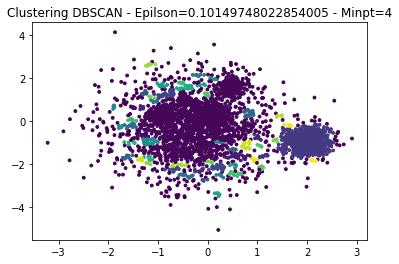

Estimated number of clusters: 38
Estimated number of noise points: 552


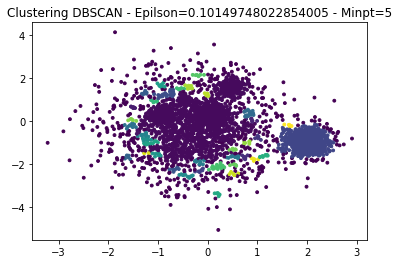

Estimated number of clusters: 26
Estimated number of noise points: 688


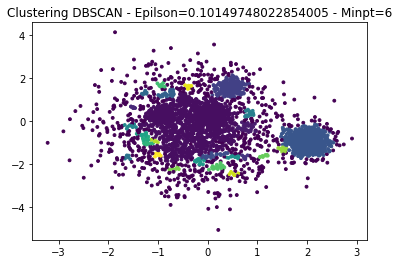

Estimated number of clusters: 16
Estimated number of noise points: 812


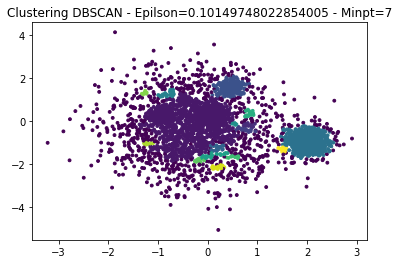

------------------------------------------------------


In [9]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import cluster
from sklearn import metrics
import time


#d64 remplace n1 pour ce test
fpn1 = "./new-data/d64.txt"
gtfpn1 = "./new-data/Ground-Truth/d64-gt.txt"
fpn2 = "./new-data/n2.txt"
gtfpn2 = "./new-data/Ground-Truth/n2-gt.txt"

datanpn1 = np.loadtxt(fpn1, dtype=int)
gtnpn1 = np.loadtxt(gtfpn2, dtype=int)
datanpn2 = np.loadtxt(fpn2, dtype=int)
gtnpn2 = np.loadtxt(gtfpn2, dtype=int)

f0n1 = datanpn1[:,0]
f1n1 = datanpn1[:,1] 
f0n2 = datanpn2[:,0]
f1n2 = datanpn2[:,1]


fig, (n1, n2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('N1 and N2 datasets')
n1.scatter(f0n1, f1n1)
n1.set_title('N1 initial dataset')
n2.scatter(f0n2, f1n2)
n2.set_title('N2 initial dataset')
plt.show()

scaler1 = preprocessing.StandardScaler()
#scaler1 = preprocessing.MinMaxScaler()
scaler2 = preprocessing.StandardScaler()
#scaler2 = preprocessing.MinMaxScaler()
scaled_datanpn1 = scaler1.fit_transform(datanpn1)
scaled_datanpn2 = scaler2.fit_transform(datanpn2)
scaled_f0n1 = scaled_datanpn1[:,0]
scaled_f1n1 = scaled_datanpn1[:,1] 
scaled_f0n2 = scaled_datanpn2[:,0]
scaled_f1n2 = scaled_datanpn2[:,1]

fig, (scaled_n1, scaled_n2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('d64 and N2 datasets')
scaled_n1.scatter(scaled_f0n1, scaled_f1n1)
scaled_n1.set_title('d64 scaled dataset')
scaled_n2.scatter(scaled_f0n2, scaled_f1n2)
scaled_n2.set_title('N2 scaled dataset')
plt.show()

##################################################################
# Utilisation de k-means sur les données scaled
print("------------------------------------------------------")
print("Utilisation de k-means sur les données scaled")

def find_max(liste):
    max_index, max_value = max(enumerate(liste), key=lambda x: x[1])
    return max_index

def find_min(liste):
    min_index, min_value = min(enumerate(liste), key=lambda x: x[1])
    return min_index

def compute_distance(X, Y):
    return np.sqrt(np.sum(np.square(X[0]-X[1]) + np.square(Y[0]-Y[1])))

def find_best_index(liste, cmp):
    distances = []
    best_index = 0
    for i in range(len(liste)):
        distance = compute_distance([0.0, cmp], [i, liste[i]])
        distances.append(distance)

    best_index = find_min(distances)
    return best_index

def get_best_k(datanp):
    inerts = []
    silhs = []
    model_kms = []
    for k in range(2,10):
        model_km = cluster.KMeans(n_clusters=k, init='k-means++')
        model_km.fit(datanp)
        labels_km = model_km.labels_
        inerts.append(model_km.inertia_)
        silhs.append(metrics.silhouette_score(datanp, model_km.labels_, metric='euclidean'))
        model_kms.append(model_km)

    best_silh = find_max(silhs)
    inerts = preprocessing.scale(inerts)
    best_inert = find_best_index(inerts, 0.0)
    # Calcul de la moyenne des metrics
    mean_k = (best_inert + best_silh) / 2
    # On rattrape le décalage d'index 
    best_k = round(mean_k) + 2
    print("best k is = ", best_k)
    print("Best inert", best_inert + 2)
    print("Best silh", best_silh + 2)
    print("++++++++++++++++++++++++++++++++++++++++++++++++++++++")

    return best_k, model_kms[best_k-2]

def run_k_means():
    datasets = [scaled_datanpn1, scaled_datanpn2]
    labels = []
    for dataset in datasets:
        tps1 = time.time()
        k, model_km = get_best_k(dataset)
        tps2 = time.time()
        # Nb iteration of this method
        iteration = model_km.n_iter_
        labels.append(model_km.labels_)
        print("nb clusters =",k,", nb iter =",iteration, ", runtime = ", round((tps2 - tps1)*1000,2),"ms")

    fig, (result_n1, result_n2) = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle('N1 and N2 datasets')
    result_n1.scatter(scaled_f0n1, scaled_f1n1, c=labels[0], s=8)
    result_n1.set_title('N1 results with k_means')
    result_n2.scatter(scaled_f0n2, scaled_f1n2, c=labels[1], s=8)
    result_n2.set_title('N2 results with k_means')
    plt.show()

run_k_means()

##################################################################
# Utilisation de clusters hierarchiques sur les données scaled

def get_best_agg(datanp):
    silhs = []
    dbss = []
    models = []
    
    for k in range(2,10):
        model_scaled = cluster.AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
        model_scaled.fit(datanp)     
        labels_scaled = model_scaled.labels_
        silhs.append(metrics.silhouette_score(datanp, labels_scaled, metric='euclidean'))  
        dbss.append(metrics.davies_bouldin_score(datanp, labels_scaled))
        models.append(model_scaled)

    best_silh = find_max(silhs)
    best_dbss = find_min(dbss)

    mean_k = (best_silh + best_dbss)/2
    best_k = round(mean_k) + 2
    print("Best silhouette : ", best_silh + 2)
    print("Best Davies-Bouldin : ", best_dbss + 2)
    print("\nbest k is = ", best_k)
    print("------------------------------------------------------")

    return best_k, models[best_k-2]

def run_with_best_k():
    datasets = [datanpn1, datanpn2]
    labels = []
    tps3 = time.time()
    for dataset in datasets:
        k, model_scaled = get_best_agg(dataset)
        labels.append(model_scaled.labels_)
    print(f"Appel Aglo Clustering 'complete' pour une valeur de {k} determinée automatiquement")
    tps4 = time.time()
    #Without scaled data
    """
    fig, (result_n1, result_n2) = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle('N1 and N2 datasets')
    result_n1.scatter(scaled_f0n1, scaled_f1n1, c=labels[0], s=8)
    result_n1.set_title('N1 results with agglomerative clustering')
    result_n2.scatter(scaled_f0n2, scaled_f1n2, c=labels[1], s=8)
    result_n2.set_title('N2 results with agglomerative clustering')
    """
    #With scaled data
    fig, (result_n1, result_n2) = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle('N1 and N2 datasets')
    result_n1.scatter(f0n1, f1n1, c=labels[0], s=8)
    result_n1.set_title('N1 results with agglomerative clustering (No preprocessing)')
    result_n2.scatter(f0n2, f1n2, c=labels[1], s=8)
    result_n2.set_title('N2 results with agglomerative clustering (No preprocessing)')
    print("nb clusters =",k,", runtime = ", round((tps4 - tps3)*1000,2),"ms")
    plt.show()

run_with_best_k()
print("------------------------------------------------------")

##################################################################
# Utilisation DBSCAN sur les données scaled
from sklearn.neighbors import NearestNeighbors

def Get_distanceMean(points,minPts,previous_distanceMean):

    if (minPts < len(points)):
        nbrs = NearestNeighbors(n_neighbors=minPts).fit(points)
        distances, indices = nbrs.kneighbors(points)
        d_mean = distances.mean()
        return d_mean
    else:
        return previous_distanceMean

def KNNdist_plot(points,minPts):
    epsPlot = []
    current_distanceMean = previous_distanceMean = 0
    knee_value = knee_found = 0
    n_trainingData = 0
    for i in range (0,len(points),5):
        current_distanceMean = Get_distanceMean(points[i:],minPts,previous_distanceMean)
        df = current_distanceMean - previous_distanceMean
        
        #print("x=" + str(i) + " , df=" + str(df))
        if (df > 0.01 and i > 1 and knee_found == 0):
            knee_value = current_distanceMean
            knee_found = 1
            n_trainingData = i
            
        epsPlot.append( [i,current_distanceMean] )
        previous_distanceMean = current_distanceMean
    
    
    #Plot the kNNdistPlot
    for i in range(0, len(epsPlot)):
                plt.scatter(epsPlot[i][0],epsPlot[i][1],c='r',s=3,marker='o')
    plt.axhline(y=knee_value, color='g', linestyle='-')
    plt.axvline(x=n_trainingData , color='g', linestyle='-')
    plt.title("kNNdistPlot")
    plt.show()
    print("Knee value: x=" + str(n_trainingData) + " , y=" + str(knee_value))
    
    return knee_value


#On utilise la fonction uniquement pour determiner la distance
kv1 = KNNdist_plot(scaled_datanpn1,3)
kv2 = KNNdist_plot(scaled_datanpn2,3)

print("++++++++++++++++++++++++++++++++++++++++++++++++++++++")

def find_best_min_samples(data, distance):
    f0 = data[:,0]
    f1 = data[:,1] 
    for k in range(2,8):
        min_pts = k
        cl_pred = cluster.DBSCAN(eps=distance, min_samples=min_pts).fit_predict(data)
        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(cl_pred)) - (1 if -1 in cl_pred else 0)
        n_noise_ = list(cl_pred).count(-1)
        print('Estimated number of clusters: %d' % n_clusters_)
        print('Estimated number of noise points: %d' % n_noise_)
        plt.scatter(f0, f1, c=cl_pred, s=8)
        plt.title(f"Clustering DBSCAN - Epilson={distance} - Minpt={min_pts}")
        plt.show()
    return n_clusters_

find_best_min_samples(scaled_datanpn1, kv1)
find_best_min_samples(scaled_datanpn2, kv2)

print("------------------------------------------------------")